# PROJECT: CASE STUDY  PART 1 

This dataset has funding information of the Indian startups from January 2015 to August 2017.

Feature Details :

SNo - Serial number.

Date - Date of funding in format DD/MM/YYYY.

StartupName - Name of the startup which got funded.

IndustryVertical - Industry to which the startup belongs.

SubVertical - Sub-category of the industry type.

CityLocation - City which the startup is based out of.

InvestorsName - Name of the investors involved in the funding round.

InvestmentType - Either Private Equity or Seed Funding.

AmountInUSD - Funding Amount in USD.

Remarks - Other information, if any.

Download link: https://drive.google.com/file/d/1BkfhQfOB9QossPbQ6sFlYa_4SQ5UIu5Q/view

In [132]:
import numpy as np 
import csv 
import pandas as pd 
import matplotlib.pyplot as plt

In [133]:
data=pd.read_csv("startup_funding (1).csv",encoding="utf-8",skipinitialspace=True)
df=data.copy()
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


Number of Fundings


Problem Statement :

Check the trend of investments over the years. To check the trend, find -

Total number of fundings done in each year.

Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.

Print year-wise total number of fundings also. Print years in ascending order.

Note :
There is some error in the 'Date' feature. Make sure to handle that.
Output Format :
year1 TotalFunding1
year2 TotalFunding2
. . . 


In [134]:
#Total number of fundings done in each year.   #priniting values which are not in correct format !!
index=0
for i in df["Date"].str.split("/"):
    if len(i)<3 or i[2]=="015":
        print(i,index)
    index+=1

['12', '05.2015'] 2103
['12', '05.2015'] 2104
['13', '04.2015'] 2159
['15', '01.2015'] 2339


In [135]:
df.iloc[2103]=["2103","12/05/2015","Mobiefit","Mobile Fitness App","NaN","Goa","Prototyze","Seed Funding","NaN","NaN"]
df.iloc[2104]=["2104","12/05/2015","Plancess","Online Education Platform","NaN","Mumbai","Rajendra Gogri,  Chandrakant Gogri","Seed Funding","2,000,000","NaN"]
df.iloc[2159]=["2159","13/04/2015","The Porter","Logistics Tech","NaN","Mumbai","Kae Capital","Seed Funding","500,000","NaN"]
df.iloc[2339]=["2339","15/01/2015","Wishberry","NaN","NaN","NaN","Rajan Anandan, Shankar Mahadevan, Deep Kalra & Others","Seed Funding","650,000","NaN"]


In [136]:
#now Total number of fundings done in each year.
datelist=df["Date"].str.split("/")
year=[]
for i in datelist:
    year.append(i[2])
    
d={}
for j in year:
    d[j]=d.get(j,0)+1
print(d)
#Plot a line graph between year and number of fundings.
#note somewhere it is 015 fix it 

{'2017': 443, '2016': 993, '2015': 935, '': 1}


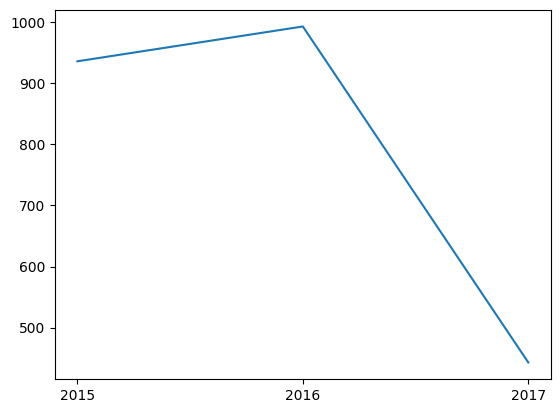

2015 936
2016 993
2017 443


In [137]:
#better method:since it will work without cleanup too 


df['Year'] = df['Date'].str[-4:]

year = df.Year.value_counts()
year.sort_index(inplace = True)

plt.plot(year)
plt.show()

nf = year.keys()
yl = year

for i in range(len(nf)):
    print(nf[i],yl[i])

Top Indian Cities

Problem Statement :

Find out which cities are generally chosen for starting a startup.

Find top 10 Indian cities which have most number of startups ?

Plot a pie chart and visualise it.

Print the city name and number of startups in that city also.

Note :
Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
Print the city in descending order with respect to the number of startups.
Output Format :
city1 number1
city2 number2
. . . 


In [55]:
#let's make a new column for city making sure of same case, incase of multuplecity split and take first one and new delhi case
def city(s):
    s=str(s)
    news=s.split(" ")
    news=news[0]
    new_s=news.title()
    if new_s=="Delhi" or new_s=="New": #this will count new york too !
        return "New Delhi"
    elif "/" in new_s:
        ans=new_s.split("/")
        return ans[0]
    elif new_s=="Bengaluru" :
        return "Bangalore"
    elif new_s=="Gurugram" :
        return "Gurgaon"
        
        
    return new_s

In [93]:
df["City"]=df["CityLocation"].apply(city)

In [94]:
df.head() #column added

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Year,City
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN,2017,Bangalore
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN,2017,Mumbai
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN,2017,New Delhi
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN,2017,Mumbai
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN,2017,Hyderabad


In [95]:
#Find top 10 Indian cities which have most number of startups ?
citydata=df["City"].value_counts()
cities=citydata.index
values=citydata.values
pievalues=[]
pielabels=[]
i=0
while i<=11:
    if cities[i]=='Nan':
        i=i+1
    pielabels.append(cities[i])
    pievalues.append(values[i])
    i=i+1

    
for j in range(len(pielabels)):
    print(pielabels[j],pievalues[j])

#wrong output for new delhi counts new york too 

Bangalore 635
Mumbai 449
New Delhi 390
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25
Kolkata 19


In [98]:
df.drop("City",axis=1,inplace=True)
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Year
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN,2017
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN,2017
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN,2017
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN,2017
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN,2017


Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


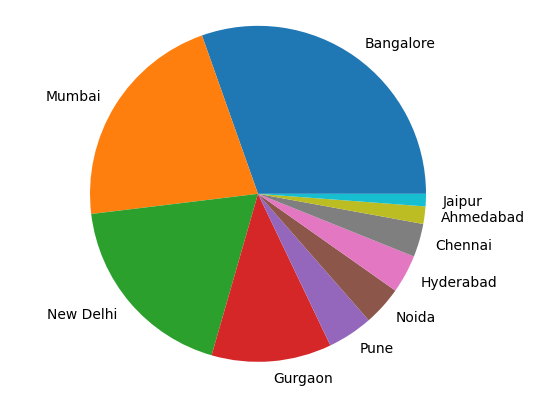

In [138]:
#correct method 
def separateCity(city):
    new_s= str(city).split('/')[0].strip()
    if new_s.lower()=="nan":
        return "NaN"
    return new_s.title()

df['CityLocation']=df['CityLocation'].apply(separateCity)
df['CityLocation'].replace("Delhi","New Delhi",inplace=True)
df['CityLocation'].replace("bangalore","Bangalore",inplace=True)

city_number=df['CityLocation'].value_counts()[0:11]
city=list(city_number.index)[:4]+list(city_number.index)[5:]
numCity=list(city_number.values)[:4]+list(city_number.values)[5:]

for i in range(len(city)):
    print(city[i], numCity[i])
    i+=1
    
plt.pie(numCity,labels=city)
plt.axis("equal")
plt.show()



Funding amount


Problem Statement :

Find out if cities play any role in receiving funding.

Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).

Print the city and percentage with 2 decimal place after rounding off.

Note:
Take city name "Delhi" as "New Delhi".
Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".
For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.
Print the city in descending order with respect to the percentage of funding.
Output Format :
city1 percent1
city2 percent2
city3 percent3
. . . 
. . .
. . .


In [139]:
#now amount are with comma which can't be converted to float or int to fix this 
def updateamount(s):
    s=str(s)
    if s=="NaN" or s=="nan":
        return 0
    l=s.split(",")
    new_s=""
    for i in l:
        new_s+=i
    return float(new_s)

In [140]:
df["AmountInUSD"]=df["AmountInUSD"].apply(updateamount)
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Year
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,NaN,2017
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,0.0,NaN,2017
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,0.0,NaN,2017
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,NaN,2017
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,NaN,2017


In [141]:
d={}
for index,i in df.iterrows():
        
    if i["CityLocation"] not in d: 
        d[i["CityLocation"]]=i["AmountInUSD"]
    else:
        d[i["CityLocation"]]+=i["AmountInUSD"]
        


city=[]
fund=[]

for i in d:
    city.append(i)
    fund.append(d[i])


    
ncity=np.array(city)
nfund=np.array(fund)
index=np.where(ncity!="NaN") 
#removing nan and NAN values
ncity=ncity[index]
nfund=nfund[index]
indexi=nfund.argsort()
ncity=ncity[indexi]
nfund=nfund[indexi]
ncity=ncity[::-1]
nfund=nfund[::-1]
total=nfund.sum()
percentage=(nfund/total)*100
for i in range(10):
    print(ncity[i],round(percentage[i],2))
    


Bangalore 49.33
New Delhi 16.5
Mumbai 13.79
Gurgaon 12.12
Chennai 2.41
Pune 2.15
Hyderabad 1.14
Noida 1.0
Ahmedabad 0.58
Jaipur 0.21


Investment Type

Problem Statement :


There are 4 different type of investments. Find out percentage of amount funded for each investment type.

Plot a pie chart to visualise.

Print the investment type and percentage of amount funded with 2 decimal places after rounding off.

Note :
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
Print the investment type in descending order with respect to the percentage of the amount funded.
Output Format :
investmentType1 percent1
investmentType2 percent2
investmentType3 percent3
. . . 


In [117]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,Year
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,NaN,2017
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,0.0,NaN,2017
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,0.0,NaN,2017
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,NaN,2017
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,NaN,2017


In [142]:
#first taking care of spelling mistakes 
def updateinvestmenttype(s):
    s=str(s).lower()
    if "private" in s:
        return "Private Equity"
    elif "seed" in s:
        return "Seed Funding"
    elif "debt" in s:
        return "Debt Funding"
    elif "crowd" in s:
        return "Crowd Funding"

In [143]:
df["InvestmentType"]=df["InvestmentType"].apply(updateinvestmenttype)
df["InvestmentType"].value_counts() #to check now only 4 types are present

InvestmentType
Seed Funding      1301
Private Equity    1067
Crowd Funding        2
Debt Funding         1
Name: count, dtype: int64

In [144]:
#Find out percentage of amount funded for each investment type.
d={}
for index,i in df.iterrows():
    if i["InvestmentType"] not in d:
        d[i["InvestmentType"]]=i["AmountInUSD"]
    else:
        d[i["InvestmentType"]]+=i["AmountInUSD"]
d.pop(None)
print(d)

{'Private Equity': 18007085000.0, 'Seed Funding': 332345708.0, 'Debt Funding': 7800000.0, 'Crowd Funding': 155768.0}


Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


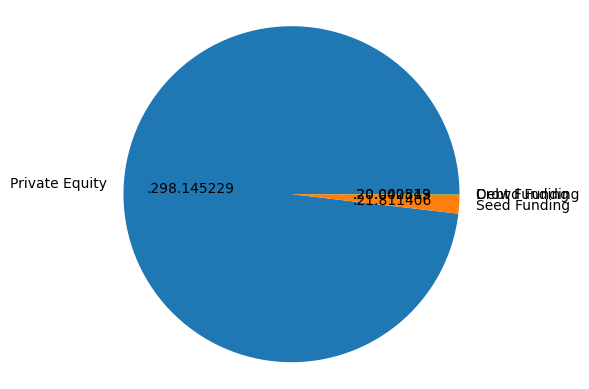

In [145]:
investype=list(d.keys())
amount=list(d.values())
it=np.array(investype)
namount=np.array(amount)
total=namount.sum()
plt.pie(namount,labels=it,autopct=".2%f")
plt.axis("equal")
perc=(namount/total)*100
for i in range(len(it)):
    print(it[i],format(perc[i],".2f"))  #round will give 0.0 format will give 0.00 for crowd funding 
    

Top Industries

Problem Statement :

Which type of companies got more easily funding. To answer this question, find -

Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)

Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.

Note :
Ecommerce is the right word in IndustryVertical, so correct it.
Print the industry in descending order with respect to the percentage of the amount funded.
Output Format :
industry1 percent1
industry2 percent2
industry3 percent3
. . . 

In [146]:
df["IndustryVertical"].value_counts()   #need to correct ecommerce 

IndustryVertical
Consumer Internet                                   772
Technology                                          313
eCommerce                                           171
ECommerce                                            53
Healthcare                                           30
                                                   ... 
Virtual Reality activity based learning platform      1
Online Grocery Store                                  1
Investment management platform                        1
Industrial Toons Marketplace                          1
NaN                                                   1
Name: count, Length: 744, dtype: int64

In [147]:
import pandas as pd
import numpy as np

df.dropna(subset=['IndustryVertical','AmountInUSD'],inplace=True)
df['IndustryVertical'].replace('ecommerce','Ecommerce',inplace=True)
df['IndustryVertical'].replace('ECommerce','Ecommerce',inplace=True)
df['IndustryVertical'].replace('eCommerce','Ecommerce',inplace=True)



iv=list(df.IndustryVertical)
amt=list(df.AmountInUSD)
d={}

for i in range(len(iv)):
    d[iv[i]]=d.get(iv[i],0)+amt[i]
    
key=list(d.keys())
values=list(d.values())

key=np.array(key)
values=np.array(values)
ind=values.argsort()[::-1]
ind=ind[:5]

key=key[ind]
values=values[ind]

values=(values/sum(values))*100
values=np.round(values,decimals=2)

for i in range(len(key)):
    print(key[i],values[i])

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


Problem Statement :

Find top 5 startups with most amount of total funding.

Print the startup name in descending order with respect to amount of funding.

Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.
Output Format :
startup1
startup2
startup3
. . . 

In [149]:
df.dropna(subset=['StartupName','AmountInUSD'],inplace=True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Ola Cabs','Ola',inplace=True)
df['StartupName'].replace('Olacabs','Ola',inplace=True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)

st=list(df.StartupName)
amt=list(df.AmountInUSD)
d={}

for i in range(len(st)):
    d[st[i]]=d.get(st[i],0)+amt[i]
    
key=list(d.keys())
values=list(d.values())

key=np.array(key)
values=np.array(values)

ind=values.argsort()[::-1]
ind=ind[:5]

key=key[ind]
values=values[ind]

for i in range(len(key)):
    print(key[i])

Paytm
Flipkart
Ola
Snapdeal
Oyo


Funding rounds

Problem Statement :

Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.

Print the startup name in descending order with respect to the number of funding round as integer value.

Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.
Output Format :
startup1 number1
startup2 number2
startup3 number3
. . . 

In [151]:


d = df["StartupName"].value_counts()
key=list(d.keys())
values=list(d)

key=np.array(key)
values=np.array(values)

ind=values.argsort()[::-1]
ind=ind[:5]

key=key[ind]
values=values[ind]

for i in range(len(key)):
    print(key[i],values[i])



Ola 9
Swiggy 7
UrbanClap 6
Medinfi 5
Flipkart 5


Top Investor

Problem Statement :

Find the Investors who have invested maximum number of times.

Print the investor name and number of times invested as integer value.

Note:
In startup, multiple investors might have invested. So consider each investor for that startup.
Ignore the undisclosed investors.
Output Format :
investorname number

In [156]:
df["InvestorsName"].value_counts()   #in startups multiple inverstors might have invester so consider them all

InvestorsName
Undisclosed Investors                                    30
Undisclosed investors                                    27
Indian Angel Network                                     24
Ratan Tata                                               22
Kalaari Capital                                          15
                                                         ..
Rohit MA                                                  1
Vertex Ventures, Cisco Ventures, IDG Ventures             1
Currae Healthtech Fund, Unicorn India Ventures            1
Rebright Partners                                         1
Rajan Anandan, Shankar Mahadevan, Deep Kalra & Others     1
Name: count, Length: 1763, dtype: int64

In [159]:
df.dropna(subset=['InvestorsName'],inplace=True)

d={}

def investor_name(invest):
    l=invest.split(',')
    for i in l:
        i=i.strip()   #creating dict for each investor as a key 
        d[i]=d.get(i,0)+1
    

df['InvestorsName'].apply(investor_name)

key=np.array(list(d.keys()))
values=np.array(list(d.values()))

ind=values.argmax() #to find index of maximum
print(key[ind],values[ind])

Sequoia Capital 54
